# Accident Data Analysis

#  Importing libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading all the important dataset

In [2]:
casual_df=pd.read_csv('Casualties0514.csv')
accident_df=pd.read_csv('Accidents0514.csv')
vehicle_df=pd.read_csv('Vehicles0514.csv')

C:\Users\shekh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# let's check all the dataset

# casualtiy dataset

In [3]:
casual_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [4]:
accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:
vehicle_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


# Getting some analysis from all three dataset

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1640597 non-null  object 
 1   Location_Easting_OSGR                        1640486 non-null  float64
 2   Location_Northing_OSGR                       1640486 non-null  float64
 3   Longitude                                    1640486 non-null  float64
 4   Latitude                                     1640486 non-null  float64
 5   Police_Force                                 1640597 non-null  int64  
 6   Accident_Severity                            1640597 non-null  int64  
 7   Number_of_Vehicles                           1640597 non-null  int64  
 8   Number_of_Casualties                         1640597 non-null  int64  
 9   Date                                         1

In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Accident_Index                    object
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      int64 
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     int64 
 15  Age_of_Driver                     int64 
 16  Age_Band_of_Driver                int64 
 17  Engine_C

In [8]:
casual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


# Mearjing all the important columns bitween the dataset

In [9]:
first_df=pd.merge(casual_df,accident_df,on='Accident_Index')

In [10]:
df=pd.merge(first_df,vehicle_df,on='Accident_Index')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4287593 entries, 0 to 4287592
Data columns (total 67 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Vehicle_Reference_x                          int64  
 2   Casualty_Reference                           int64  
 3   Casualty_Class                               int64  
 4   Sex_of_Casualty                              int64  
 5   Age_of_Casualty                              int64  
 6   Age_Band_of_Casualty                         int64  
 7   Casualty_Severity                            int64  
 8   Pedestrian_Location                          int64  
 9   Pedestrian_Movement                          int64  
 10  Car_Passenger                                int64  
 11  Bus_or_Coach_Passenger                       int64  
 12  Pedestrian_Road_Maintenance_Worker           int64  
 13  Casualty_Typ

In [12]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,1,15,2,49,8,1769,1,4,2,1


# Cheking Null values

In [59]:
df.isnull().sum()

Accident_Index           0
Vehicle_Reference_x      0
Casualty_Reference       0
Casualty_Class           0
Sex_of_Casualty          0
                        ..
Age_of_Vehicle           0
Driver_IMD_Decile        0
Driver_Home_Area_Type    0
Month                    0
Hour                     0
Length: 68, dtype: int64

# handling null values

In [14]:
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)

In [15]:
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)

In [16]:
df.dropna(subset=['Time'],axis=0,inplace=True)

In [17]:
df.isnull().values.any()

False

### The dataset is now clean and combined. Let's begin creating subframes as required to answer questions.

In [18]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,1,15,2,49,8,1769,1,4,2,1


In [19]:
#creating function to add month column
def month(string):
    return int(string[3:5])
df['Month']=df['Date'].apply(lambda x: month(x))

In [20]:
#creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [21]:
#getting a dataframe as per q1
q1_df=pd.DataFrame(data=df,columns=['Hour','Day_of_Week','Month','Accident_Severity'])

In [22]:
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
0,17,3,1,2
1,17,4,1,3
2,0,5,1,3
3,0,5,1,3
4,10,6,1,3


In [23]:
#getting q1_df as per q1 i.e. getting cases of 'Fatal Accidents' only.
q1_df=q1_df[q1_df.Accident_Severity ==1]

In [24]:
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
1646,18,4,5,1
1647,18,4,5,1
1648,18,4,5,1
1649,18,4,5,1
34637,9,4,11,1


<AxesSubplot:>

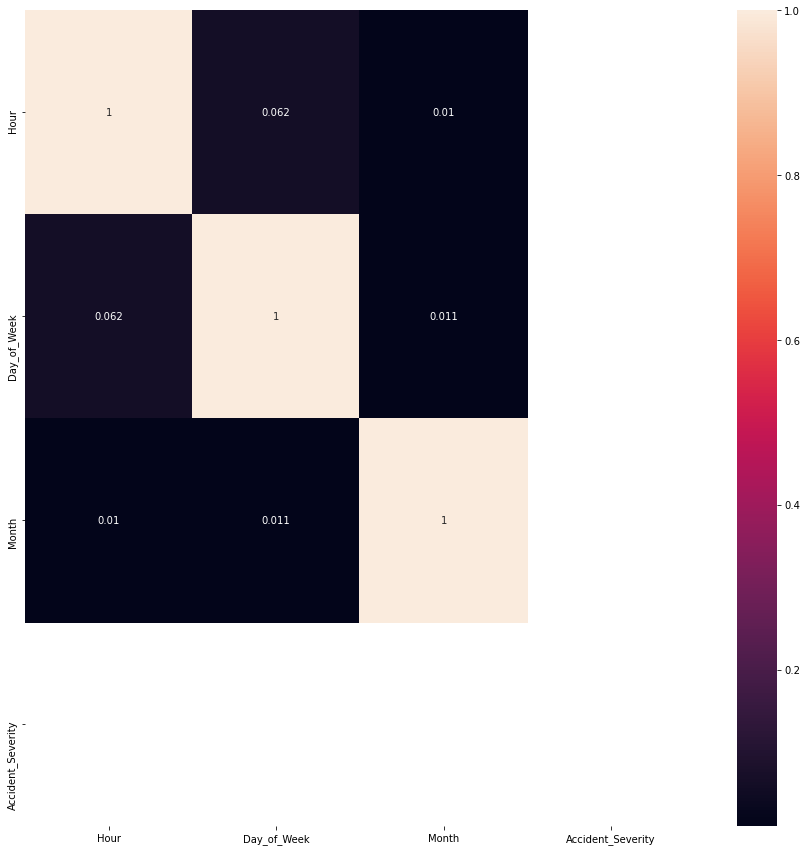

In [25]:
#Visualizing correlation
plt.figure(figsize = (15,15))
import seaborn as sns
corr = q1_df.corr()
sns.heatmap(corr, annot = True)

# checking the  driver age has an effect on the number of accident?

In [26]:
q2_df=  pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])


In [27]:
q2_df=q2_df[q2_df.Sex_of_Driver !=-1]
q2_df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,15,2,74,10,1
1,1,1,42,7,-1
2,1,1,35,6,1
3,15,1,62,9,1
4,15,2,49,8,1


In [28]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q2_df.Age_Band_of_Driver=q2_df.Age_Band_of_Driver.map(map_df_age)
q2_df.Journey_Purpose_of_Driver=q2_df.Journey_Purpose_of_Driver.map(map_df)
q2_df.Driver_Home_Area_Type=q2_df.Driver_Home_Area_Type.map(map_df_area)
q2_df.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,Not known/Other,2,74,66 - 75,Urban Area
1,Journey as part of work,1,42,36 - 45,NaN
2,Journey as part of work,1,35,26 - 35,Urban Area
3,Not known/Other,1,62,56 - 65,Urban Area
4,Not known/Other,2,49,46 - 55,Urban Area


<AxesSubplot:>

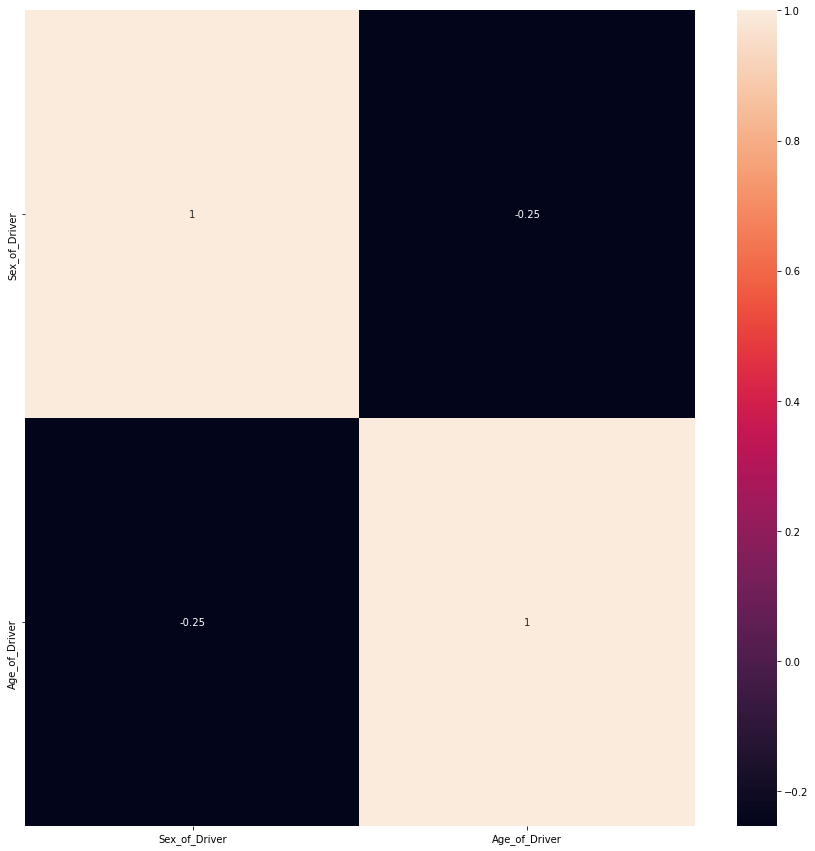

In [29]:
#Visualizing correlation
plt.figure(figsize = (15,15))
import seaborn as sns
corr = q2_df.corr()
sns.heatmap(corr, annot = True)

# Data visualazation

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Journey Purpose of Driver vs Age_of_Driver')

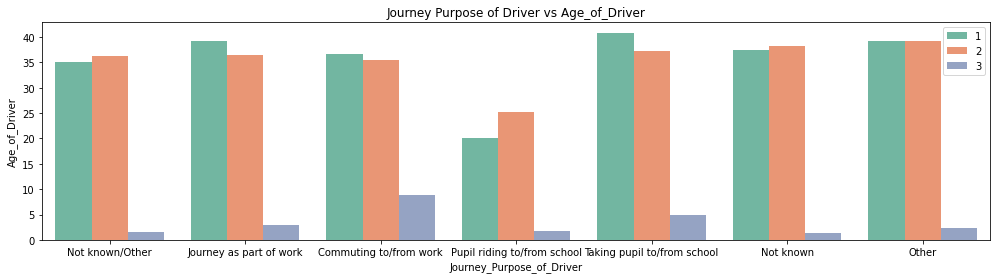

In [30]:
plt.figure(figsize=(17,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=q2_df,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))

plt.title('Journey Purpose of Driver vs Age_of_Driver')

# It is seen that the Drivers who met with an accident were in the age range of 30-40 years.

      Usually, drivers who meet with an accident are males.

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driver_Home_Area_Type', ylabel='Age_of_Driver'>

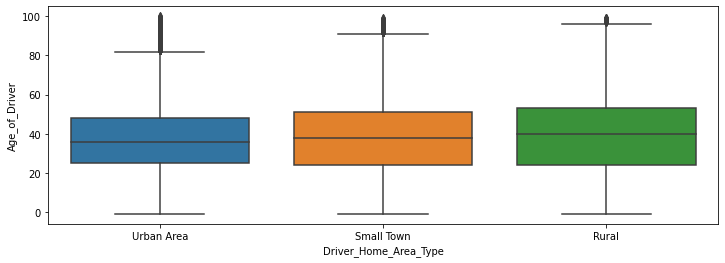

In [31]:
plt.figure(figsize=(12,4))
sns.boxplot('Driver_Home_Area_Type','Age_of_Driver',data=q2_df)

# How the weather impact the number or severity of an accident?

In [32]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Month,Hour
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,2,74,10,-1,-1,-1,7,1,1,17
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1,42,7,8268,2,3,-1,-1,1,17
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,35,6,8300,2,5,2,1,1,0
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1,62,9,1762,1,6,1,1,1,0
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,2,49,8,1769,1,4,2,1,1,10


In [33]:
q3_df=pd.DataFrame(data=df,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Hour'])

In [34]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

In [35]:
q3_df['Time_of_Day']=q3_df['Hour'].apply(lambda x: time_of_day(x))


In [36]:
q3_df.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour,Time_of_Day
0,2,1,2,17,Evening
1,3,4,1,17,Evening
2,3,4,1,0,Night
3,3,4,1,0,Night
4,3,1,1,10,Morning


In [37]:
q3_df=q3_df[q3_df.Weather_Conditions!=-1]

<AxesSubplot:>

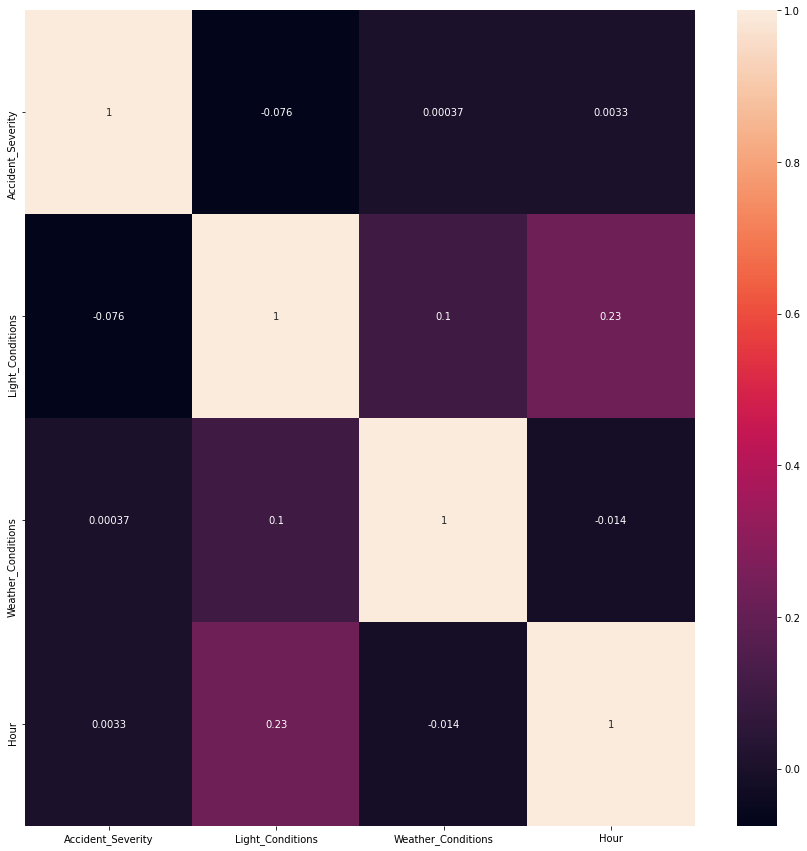

In [38]:
#Visualizing correlation
plt.figure(figsize = (15,15))
import seaborn as sns
corr = q3_df.corr()
sns.heatmap(corr, annot = True)

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weather vs Hour_of_Accident')

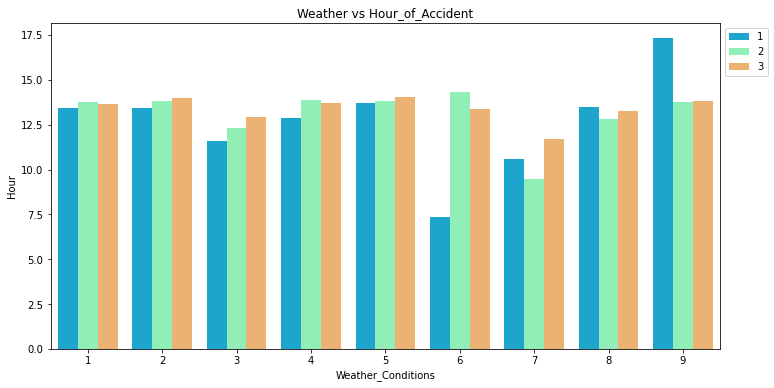

In [39]:
plt.figure(figsize=(12,6))
sns.barplot('Weather_Conditions','Hour',data=q3_df, hue='Accident_Severity',ci=None, palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Hour_of_Accident')

1: Fatal
2: Serious
3: Slight
Weather Conditions


1: Fine no high winds

2: Raining no high winds

3: Snowing no high winds

4: Fine + high winds

5: Raining + high winds

6: Snowing + high winds

7: Fog or mist

8: Other

9: Unknown


<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

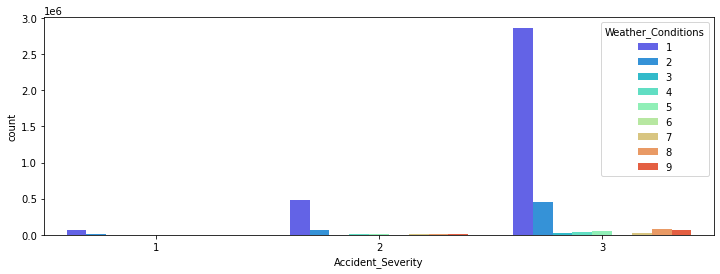

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=q3_df,hue='Weather_Conditions',palette='rainbow')


In [41]:
df.Accident_Severity.value_counts()

3    3606998
2     596470
1      83605
Name: Accident_Severity, dtype: int64

Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident

Accidents with Slight severity occured the most

Accidents ususally took place when the Weather conditions were fine and also there were'nt any high winds : meaning which the 

weather conditions didn't effectively contribute to occurences of accidents.

# First let's begin with prediction of fatal accidents

In [42]:
fatal_df=pd.DataFrame(data=df,columns=['Sex_of_Driver','Age_of_Driver','Vehicle_Type','Month','Accident_Severity'])

In [43]:
fatal_df=fatal_df[(fatal_df.Sex_of_Driver!=-1) & (fatal_df.Vehicle_Type!=-1) & (fatal_df.Sex_of_Driver!=-1) & (fatal_df.Sex_of_Driver!=3)]
fatal_df.head()


,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity
0,2,74,9,1,2
1,1,42,11,1,3
2,1,35,11,1,3
3,1,62,9,1,3
4,2,49,9,1,3


In [44]:
acc=pd.get_dummies(data=fatal_df,columns=['Accident_Severity'])
sex=pd.get_dummies(data=fatal_df,columns=['Sex_of_Driver'])

In [45]:
sex.head()

,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Sex_of_Driver_1,Sex_of_Driver_2
0,74,9,1,2,0,1
1,42,11,1,3,1,0
2,35,11,1,3,1,0
3,62,9,1,3,1,0
4,49,9,1,3,0,1


In [46]:
fatal_df=pd.concat([fatal_df,acc['Accident_Severity_1'],sex['Sex_of_Driver_1']],axis=1)
fatal_df.head()

,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Accident_Severity_1,Sex_of_Driver_1
0,2,74,9,1,2,0,0
1,1,42,11,1,3,0,1
2,1,35,11,1,3,0,1
3,1,62,9,1,3,0,1
4,2,49,9,1,3,0,0


In [47]:
fatal_df.drop(['Accident_Severity','Sex_of_Driver'],axis=1,inplace=True)
fatal_df.head()


,Age_of_Driver,Vehicle_Type,Month,Accident_Severity_1,Sex_of_Driver_1
0,74,9,1,0,0
1,42,11,1,0,1
2,35,11,1,0,1
3,62,9,1,0,1
4,49,9,1,0,0


Note: Accident_Severity_1 corresponds to fatal accident and Sex_of_Driver_1 corresponds to male driver

In [48]:
X=fatal_df.drop('Accident_Severity_1',axis=1)
y=fatal_df['Accident_Severity_1']  # x.loc[df,hbcc'dccbuc']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

## Using Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree= DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions= dtree.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    998357
           1       0.39      0.00      0.01     20195

    accuracy                           0.98   1018552
   macro avg       0.68      0.50      0.50   1018552
weighted avg       0.97      0.98      0.97   1018552



# seems like the model didn't do well

  - Though the precision is good, it is noticed that the model had better predictions for only case:0
  -  Also, checking the recall, it is noticed that case:1 is neglected.


In [57]:
print(confusion_matrix(y_test,predictions))

[[998263     94]
 [ 20135     60]]
